Empezamos a trabajar con el dataset proporcionado sin demora ninguna, recordando que Larry nos había mostrado particular interés en el distrito de Abbotsford, ya que vivía la mejor amiga de su mmujer, pero bueno empezamos primero viendo nuestro dataset

In [29]:
import numpy as np 
from numpy import sqrt, abs, round
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import math
from scipy.stats import norm, uniform, zscore
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_big = pd.read_csv("housing_Melbourne_big.csv")
df=pd.read_csv("housing_Melbourne.csv")
df_big

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df_big.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
num_col = df_big.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df_big.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Categorical columns: 
 Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
df_big.drop(["Address","Date","Postcode"], axis=1,inplace=True)
df_big.dropna(inplace=True)

from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

df_big['Suburb']= label_encoder.fit_transform(df_big['Suburb'])
df_big['Type']= label_encoder.fit_transform(df_big['Type'])
df_big['Method']= label_encoder.fit_transform(df_big['Method'])
df_big['SellerG']= label_encoder.fit_transform(df_big['SellerG'])
df_big['Regionname']= label_encoder.fit_transform(df_big['Regionname'])
df_big['CouncilArea']= label_encoder.fit_transform(df_big['CouncilArea'])
  
df_big.head()


,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,2,0,1035000.0,1,22,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
4,0,3,0,1465000.0,3,22,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
6,0,4,0,1600000.0,4,147,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0
11,0,3,0,1876000.0,1,147,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0
14,0,2,0,1636000.0,1,147,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0


array([[<Axes: title={'center': 'Suburb'}>,
        <Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Method'}>,
        <Axes: title={'center': 'SellerG'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'CouncilArea'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Regionname'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

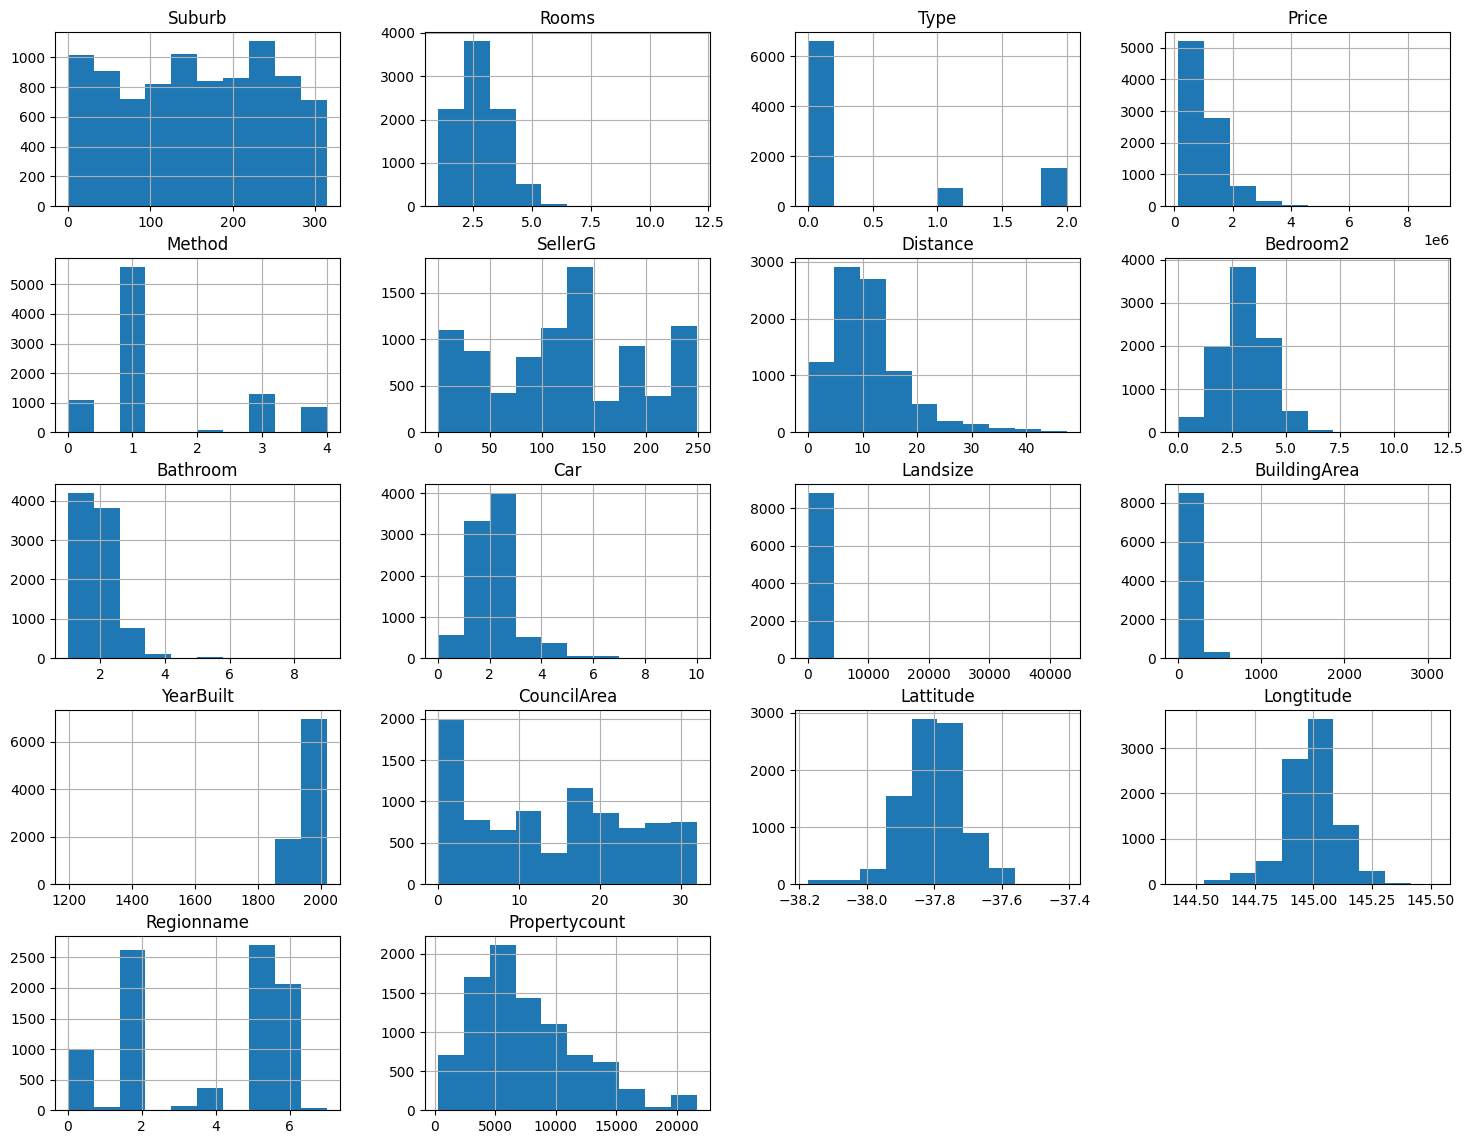

In [7]:
df_big.hist(figsize=(18,14))

<Axes: title={'center': 'Price Distribution Plot'}, xlabel='Price', ylabel='Count'>

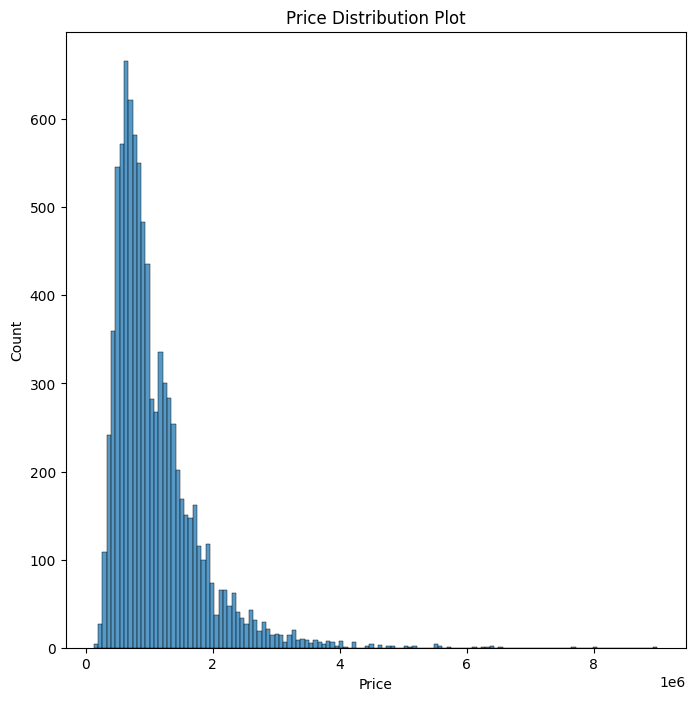

In [8]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.histplot(df_big['Price'])

<Axes: >

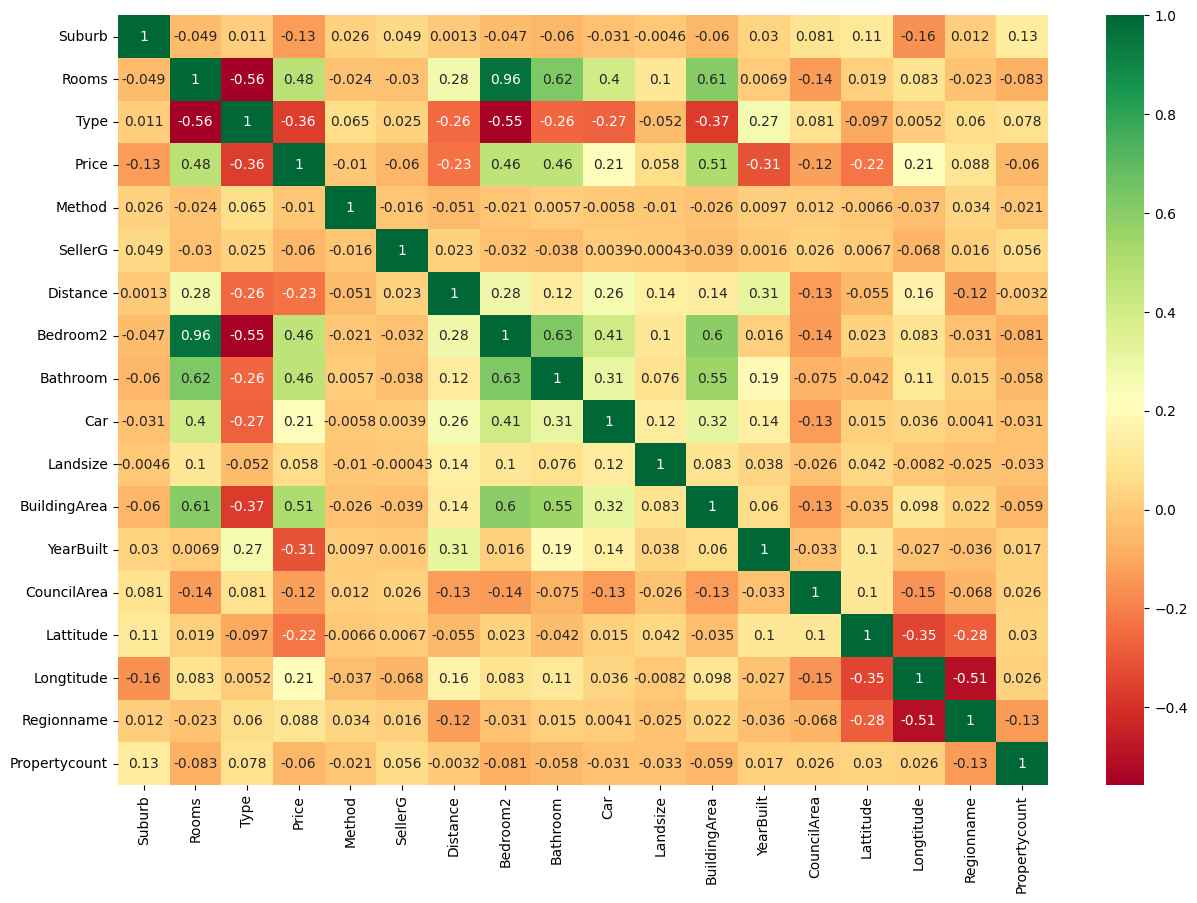

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df_big.corr(),cmap='RdYlGn', annot=True)

In [34]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_big, 
                        lat="Lattitude", 
                        lon="Longtitude", 
                        hover_name="Price", 
                        hover_data=["Price"],
                        color="Price",
                        color_continuous_scale=color_scale,
                        size="Price",
                        zoom=9, 
                        height=1000,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


### En este estudio, intentaré realizar una prueba básica de hipótesis para el distrito de Abbotsford en Melbourne.

- **Hipótesis nula (H₀):** Los precios de las casas en Abbotsford-Melbourne son más caros que en Melbourne en general.  
  
- **Hipótesis alternativa (H₁):** Los precios de las casas en Abbotsford-Melbourne no son más caros que en Melbourne en general.  

In [12]:
df_without_null_prices = df[~df["Price"].isnull()]
prices = df_without_null_prices["Price"]
prices

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

In [13]:
in_abbotsford = df_without_null_prices.loc[df["Suburb"] == "Abbotsford"]
prices_in_abbotsford = in_abbotsford["Price"]
prices_in_abbotsford

0        1490000.0
1        1220000.0
2        1420000.0
670      1350000.0
1622      830000.0
4987     1480000.0
5771     1035000.0
5877     1465000.0
5878      850000.0
6725     1600000.0
7803     1950000.0
7804     1720000.0
8415      750000.0
10073    1150000.0
10074    1445000.0
10075     750000.0
10592     570000.0
11010     941000.0
11011    1876000.0
11664    1457500.0
11995    1150000.0
11996    1370000.0
11998    1240000.0
13159     750000.0
13947    1800000.0
13948    1000000.0
14768     550000.0
15749    1636000.0
15750    1000000.0
15751     745000.0
15752     300000.0
15753    1097000.0
15754     542000.0
17138     970000.0
18063     420000.0
19147     760000.0
19148     481000.0
20907    1300000.0
20908     505000.0
20909     940000.0
22409    1635000.0
22410     940000.0
22411    1375000.0
22412    1525000.0
22955     700000.0
22956    1350000.0
22957     750000.0
22958    1985000.0
22959     500000.0
23697    1271000.0
23698     745000.0
24370    1172500.0
25272    127

In [14]:
prices_in_abbotsford_mean = prices_in_abbotsford.mean()
prices_in_abbotsford_mean

np.float64(1040200.7042253522)

In [15]:
prices_mean = prices.mean()
prices_mean

np.float64(997898.2414882415)

In [16]:
prices_in_abbotsford_std = prices_in_abbotsford.std()
prices_in_abbotsford_std

np.float64(374652.7473051951)

In [17]:
prices_std = prices.std()
prices_std

np.float64(593498.9190372769)

In [18]:
prices_in_abbotsford_len = len(prices_in_abbotsford)
prices_in_abbotsford_len
prices_len = len(prices)
prices_len

48433

In [19]:
min_price = prices.min()
max_price = prices.max()
min_abbotsford_price = prices_in_abbotsford.min()
max_abbotsford_price = prices_in_abbotsford.max()

In [20]:
standard_error = prices_std / math.sqrt(prices_in_abbotsford_len)
standard_error

np.float64(49805.32290253187)

### Como se declaró en la hipótesis, se sabe que Abbotsford es un distrito de Melbourne. Primero se calcularon la media y la desviación estándar de la población (Melbourne) y de la muestra (Abbotsford):

- **Media de los precios de las casas en Melbourne:** $997,898$  
  
- **Desviación estándar de los precios de las casas en Melbourne:** $593,498$  
  
- **Media de los precios de las casas en Abbotsford:** $1,040,200$  
  
- **Desviación estándar de los precios de las casas en Abbotsford:** $374,652$  

### Después de esto, se determinó cómo la media de Abbotsford se desvía de la población total (Melbourne) en términos de unidades de error estándar. El resultado del cálculo fue:  
- **Unidades de error estándar (se):** $0.84$  
  
- **Valor p:** $0.39$  

In [21]:
mean_diff = prices_in_abbotsford_mean - prices_mean

In [22]:
standard_errors_away = mean_diff / standard_error
standard_errors_away

np.float64(0.8493562589664531)

In [23]:
p_value = 2 * (1-norm.cdf(abs(standard_errors_away)))
p_value

np.float64(0.3956830847123256)

In [24]:
mu = prices_mean
sigma = prices_std / sqrt(prices_in_abbotsford_len)

In [25]:
mu = prices_mean
sigma = prices_std / sqrt(prices_in_abbotsford_len)

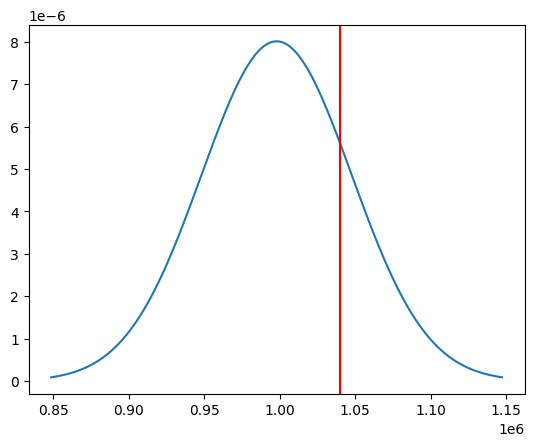

In [26]:

x = np.linspace(mu - 3*sigma, mu + 3*sigma, len(prices))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=prices_in_abbotsford_mean, color="r")
plt.show()

In [27]:
sigma

np.float64(49805.32290253187)

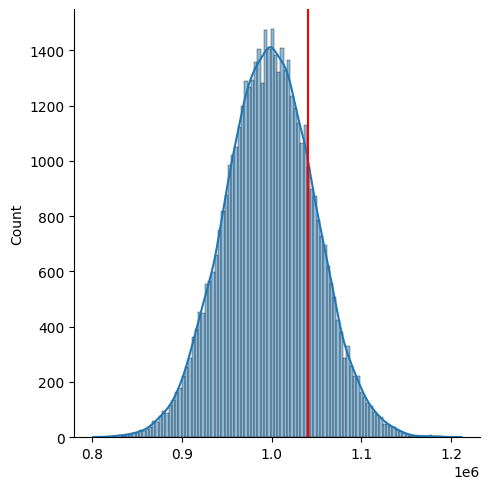

In [28]:
value = np.random.normal(loc=prices_mean,scale=sigma,size=len(prices))
sns.displot(value, kde=True)
plt.axvline(prices_in_abbotsford_mean, color='red')

Entonces, la media de los precios de las casas en Abbotsford fue $0,84$ unidades de error estándar más alta que la media de la población. Preferí alinearme con la convención general de un nivel de error estándar de $1,645$ y un nivel de valor `p` de $0,05$. Dado que nuestros 

valores de error estándar $(0,84 < 1,645)$

 y el valor 
 
 $p (0,39 > 0,05)$ 
 
 no cumplen los criterios, la hipótesis de que los precios de las casas en Abbotsford-Melbourne son más altos que en Melbourne en general es rechazada. Podemos asumir que las casas en Abbotsford no son significativamente más caras que las de la población total, es decir, Melbourne. 

Dado que la unidad de error estándar se encuentra en $49.805$ dólares, y la media del precio de las casas en Abbotsford está a $0,84$ unidades de error estándar de distancia, el cálculo es:  

$49.805$ dólares $*$ $0,84 = 41.836$ dólares. Esto significa que la media de los precios de las casas en Abbotsford está $41.836$ dólares por encima de la media de los precios de las casas en Melbourne.  

Podemos observar los gráficos de resultados más arriba. Estos no representan una `distribución normal estandarizada`, por lo que es necesario explicarlo. En los gráficos trazados, 1.0 significa 1,0 billones de dólares, y 1.1 también significa 1,1 billones de dólares. Desde la línea roja, que representa la media de los precios de las casas en Abbotsford, podemos observar claramente en la gráfica que está desviada $41.836$ dólares.

Hasta aquí habíamos hecho un buen trabajo con este estado, pero queríamos darle el plus a nuestro trabajo aplicando lo que aprendimos en estadística, queriamos hacer un modelo predictivo usando el método de regresión lineal, de esa forma podíamos encantar aún más a nuestro cliente, y nos pusimos a ello entonces.